# GlassTypePrediction
Responsibility : Mariam Amr

## Imports

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [2]:
df = pd.read_csv(
    "./AMLAss1Datasets/glasstypePrediction.csv"
)  # Suitable for classification

## Preprocessing
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [3]:
# Renaming the columns
df.columns = [
    "ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe", "type"
]

In [4]:
# Scaling the numerical features
scaler = StandardScaler()
df[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]] = scaler.fit_transform(
    df[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]]
)

In [5]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


## Model Implementation & Hyperparameter Turning

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [6]:
#Train Test Split
y = df["type"]
X = df.drop("type", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state here is used to randomly split the data into train and test sets (randomize data before split)

Random Forest Classifier

In [7]:
#random_state here and in the other models introduces randomness when splitting and selecting the feature subsets but also when comparing models, setting random_state to the same value will make the comparison fair (instead of using internal randomness)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Performance
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average="macro",zero_division=1)
recall_rf = recall_score(y_test, y_pred, average="macro",zero_division=1)
f1_rf = f1_score(y_test, y_pred, average="macro",zero_division=1)

print("Random Forest Classifier default parameters:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier default parameters:
Accuracy: 0.8372093023255814
Precision: 0.9127314814814816
Recall: 0.8432539682539683
F1 Score: 0.8605223570909845


In [8]:
#Hyperparameter Tuning with RandomSearchCV
params={
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=100, cv=5)

rf_random.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier:")
print(rf_random.best_params_)

Best parameters for Random Forest Classifier:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [9]:
#Hyperparameter Tuning with GridSearchCV
rf_grid = GridSearchCV(rf_model, param_grid=params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier from Grid Search:")
print(rf_grid.best_params_)

Best parameters for Random Forest Classifier from Grid Search:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [10]:
#Final Comparison between initial and tuned models

#Tuned model
rf_model_tuned = RandomForestClassifier(
    n_estimators=150,
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
)
rf_model_tuned.fit(X_train, y_train)
y_pred_tuned = rf_model_tuned.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_tuned, average="macro",zero_division=1)
recall_rf_tuned = recall_score(y_test, y_pred_tuned, average="macro",zero_division=1)
f1_rf_tuned = f1_score(y_test, y_pred_tuned, average="macro",zero_division=1)

print("Random Forest Classifier tuned parameters:")
print("Accuracy:", accuracy_rf_tuned)
print("Precision:", precision_rf_tuned)
print("Recall:", recall_rf_tuned)
print("F1 Score:", f1_rf_tuned)

#Initial model
print("\n")
print("Random Forest Classifier default parameters:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier tuned parameters:
Accuracy: 0.8604651162790697
Precision: 0.9299145299145298
Recall: 0.8253968253968255
F1 Score: 0.8546058879392212


Random Forest Classifier default parameters:
Accuracy: 0.8372093023255814
Precision: 0.9127314814814816
Recall: 0.8432539682539683
F1 Score: 0.8605223570909845


AdaBoost Classifier

In [11]:
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)

#Performance
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab, average="macro",zero_division=1)
recall_ab = recall_score(y_test, y_pred_ab, average="macro",zero_division=1)
f1_ab = f1_score(y_test, y_pred_ab, average="macro",zero_division=1)

print("AdaBoost Classifier default parameters performance:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1 Score:", f1_ab)

AdaBoost Classifier default parameters performance:
Accuracy: 0.4883720930232558
Precision: 0.7671568627450981
Recall: 0.43127705627705626
F1 Score: 0.3815668202764977


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [12]:
#Hyperparameter Tuning with RandomSearchCV
params={
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

ab_random = RandomizedSearchCV(ab_model, param_distributions=params, n_iter=100, cv=5)
ab_random.fit(X_train, y_train)

print("Best parameters for AdaBoost Classifier with Random Search:")
print(ab_random.best_params_)

Best parameters for AdaBoost Classifier with Random Search:
{'n_estimators': 150, 'learning_rate': 0.1}


In [13]:
#Hyperparameter Tuning with GridSearchCV
ab_grid = GridSearchCV(ab_model, param_grid=params, cv=5)
ab_grid.fit(X_train, y_train)

print("Best parameters for AdaBoost Classifier from Grid Search:")
print(ab_grid.best_params_)

Best parameters for AdaBoost Classifier from Grid Search:
{'learning_rate': 0.1, 'n_estimators': 150}


In [14]:
#Final Comparison between initial and tuned models

#Tuned model
ab_model_tuned = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.1,
    random_state=42,
)
ab_model_tuned.fit(X_train, y_train)
ab_y_pred_tuned = ab_model_tuned.predict(X_test)

accuracy_ab_tuned = accuracy_score(y_test, ab_y_pred_tuned)
precision_ab_tuned = precision_score(y_test, ab_y_pred_tuned, average="macro",zero_division=1)
recall_ab_tuned = recall_score(y_test, ab_y_pred_tuned, average="macro",zero_division=1)
f1_ab_tuned = f1_score(y_test, ab_y_pred_tuned, average="macro",zero_division=1)

print("AdaBoost Classifier tuned parameters:")
print("Accuracy:", accuracy_ab_tuned)
print("Precision:", precision_ab_tuned)
print("Recall:", recall_ab_tuned)
print("F1 Score:", f1_ab_tuned)

#Initial model
print("\n")
print("AdaBoost Classifier default parameters performance:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1 Score:", f1_ab)


AdaBoost Classifier tuned parameters:
Accuracy: 0.6976744186046512
Precision: 0.7705415499533146
Recall: 0.6006493506493507
F1 Score: 0.5954224270353302


AdaBoost Classifier default parameters performance:
Accuracy: 0.4883720930232558
Precision: 0.7671568627450981
Recall: 0.43127705627705626
F1 Score: 0.3815668202764977


Gradient Boost Classifier

In [15]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

#Performance
accuracy_gb = accuracy_score(y_test, gb_y_pred)
precision_gb = precision_score(y_test, gb_y_pred, average="macro",zero_division=1)
recall_gb = recall_score(y_test, gb_y_pred, average="macro",zero_division=1)
f1_gb = f1_score(y_test, gb_y_pred, average="macro",zero_division=1)

print("Gradient Boosting Classifier default parameters performance:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

Gradient Boosting Classifier default parameters performance:
Accuracy: 0.8604651162790697
Precision: 0.8902116402116403
Recall: 0.8115079365079364
F1 Score: 0.813602671837966


In [16]:
#Hyperparameter Tuning with RandomSearchCV
params={
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1,1.5],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 1, 10]
}

gb_random = RandomizedSearchCV(gb_model, param_distributions=params, n_iter=100, cv=5)
gb_random.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier with Random Search:")
print(gb_random.best_params_)

Best parameters for Gradient Boosting Classifier with Random Search:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}


In [17]:
#Hyperparameter Tuning with GridSearchCV
gb_grid = GridSearchCV(gb_model, param_grid=params, cv=5)
gb_grid.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier from Grid Search:")
print(gb_grid.best_params_)

Best parameters for Gradient Boosting Classifier from Grid Search:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [19]:
#Final Comparison between initial and tuned models

#Tuned model
gb_model_tuned = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
)
gb_model_tuned.fit(X_train, y_train)
gb_y_pred_tuned = gb_model_tuned.predict(X_test)

accuracy_gb_tuned = accuracy_score(y_test, gb_y_pred_tuned)
precision_gb_tuned = precision_score(y_test, gb_y_pred_tuned, average="macro",zero_division=1)
recall_gb_tuned = recall_score(y_test, gb_y_pred_tuned, average="macro",zero_division=1)
f1_gb_tuned = f1_score(y_test, gb_y_pred_tuned, average="macro",zero_division=1)

print("\n")
print("Gradient Boosting Classifier tuned parameters:")
print("Accuracy:", accuracy_gb_tuned)
print("Precision:", precision_gb_tuned)
print("Recall:", recall_gb_tuned)
print("F1 Score:", f1_gb_tuned)

#Initial model
print("\n")
print("Gradient Boosting Classifier default parameters performance:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)



Gradient Boosting Classifier tuned parameters:
Accuracy: 0.8837209302325582
Precision: 0.9386446886446885
Recall: 0.8809523809523809
F1 Score: 0.8935802469135803


Gradient Boosting Classifier default parameters performance:
Accuracy: 0.8604651162790697
Precision: 0.8902116402116403
Recall: 0.8115079365079364
F1 Score: 0.813602671837966


Comparison and Visualizations

In [20]:
# Comparing the performance of the models
models = [
    "Random Forest Classifier",
    "Random Forest Classifier with best hyperparameters",
    "AdaBoost Classifier",
    "AdaBoost Classifier with best hyperparameters",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier with best hyperparameters",
]

accuracies = [
    accuracy_score(y_test, rf_model.predict(X_test)),
    accuracy_score(y_test, rf_model_tuned.predict(X_test)),
    accuracy_score(y_test, ab_model.predict(X_test)),
    accuracy_score(y_test, ab_model_tuned.predict(X_test)),
    accuracy_score(y_test, gb_model.predict(X_test)),
    accuracy_score(y_test, gb_model_tuned.predict(X_test)),
]

precisions = [
    precision_score(y_test, rf_model.predict(X_test), average="macro",zero_division=1),
    precision_score(y_test, rf_model_tuned.predict(X_test), average="macro",zero_division=1),
    precision_score(y_test, ab_model.predict(X_test), average="macro",zero_division=1),
    precision_score(y_test, ab_model_tuned.predict(X_test), average="macro",zero_division=1),
    precision_score(y_test, gb_model.predict(X_test), average="macro",zero_division=1),
    precision_score(y_test, gb_model_tuned.predict(X_test), average="macro",zero_division=1),
]

recalls = [
    recall_score(y_test, rf_model.predict(X_test), average="macro",zero_division=1),
    recall_score(y_test, rf_model_tuned.predict(X_test), average="macro",zero_division=1),
    recall_score(y_test, ab_model.predict(X_test), average="macro",zero_division=1),
    recall_score(y_test, ab_model_tuned.predict(X_test), average="macro",zero_division=1),
    recall_score(y_test, gb_model.predict(X_test), average="macro",zero_division=1),
    recall_score(y_test, gb_model_tuned.predict(X_test), average="macro",zero_division=1),
]

f1_scores = [
    f1_score(y_test, rf_model.predict(X_test), average="macro",zero_division=1),
    f1_score(y_test, rf_model_tuned.predict(X_test), average="macro",zero_division=1),
    f1_score(y_test, ab_model.predict(X_test), average="macro",zero_division=1),
    f1_score(y_test, ab_model_tuned.predict(X_test), average="macro",zero_division=1),
    f1_score(y_test, gb_model.predict(X_test), average="macro",zero_division=1),
    f1_score(y_test, gb_model_tuned.predict(X_test), average="macro",zero_division=1),
]

model_comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
})

model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.837209,0.912731,0.843254,0.860522
1,Random Forest Classifier with best hyperparame...,0.860465,0.929915,0.825397,0.854606
2,AdaBoost Classifier,0.488372,0.767157,0.431277,0.381567
3,AdaBoost Classifier with best hyperparameters,0.697674,0.770542,0.600649,0.595422
4,Gradient Boosting Classifier,0.860465,0.890212,0.811508,0.813603
5,Gradient Boosting Classifier with best hyperpa...,0.883721,0.938645,0.880952,0.893580


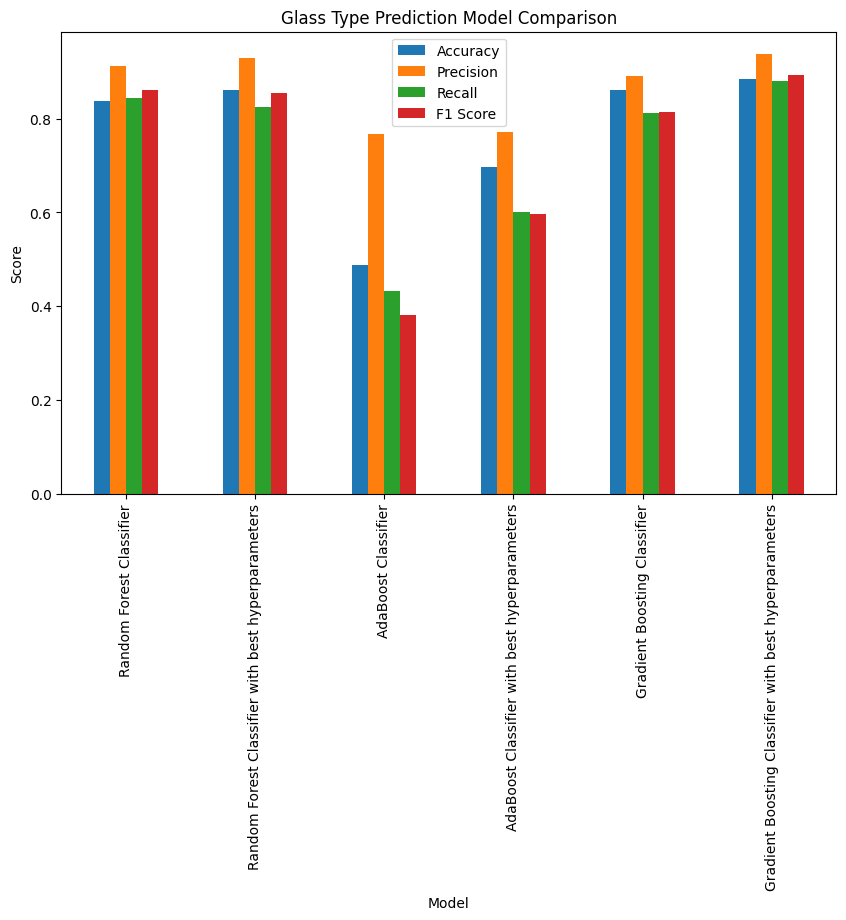

In [21]:
model_comparison.plot(kind="bar", x="Model", figsize=(10, 6))

plt.title("Glass Type Prediction Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()